# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
try:
    raw_data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    raw_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
raw_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(raw_data.info())
print(raw_data.describe())
print(raw_data.shape)
raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


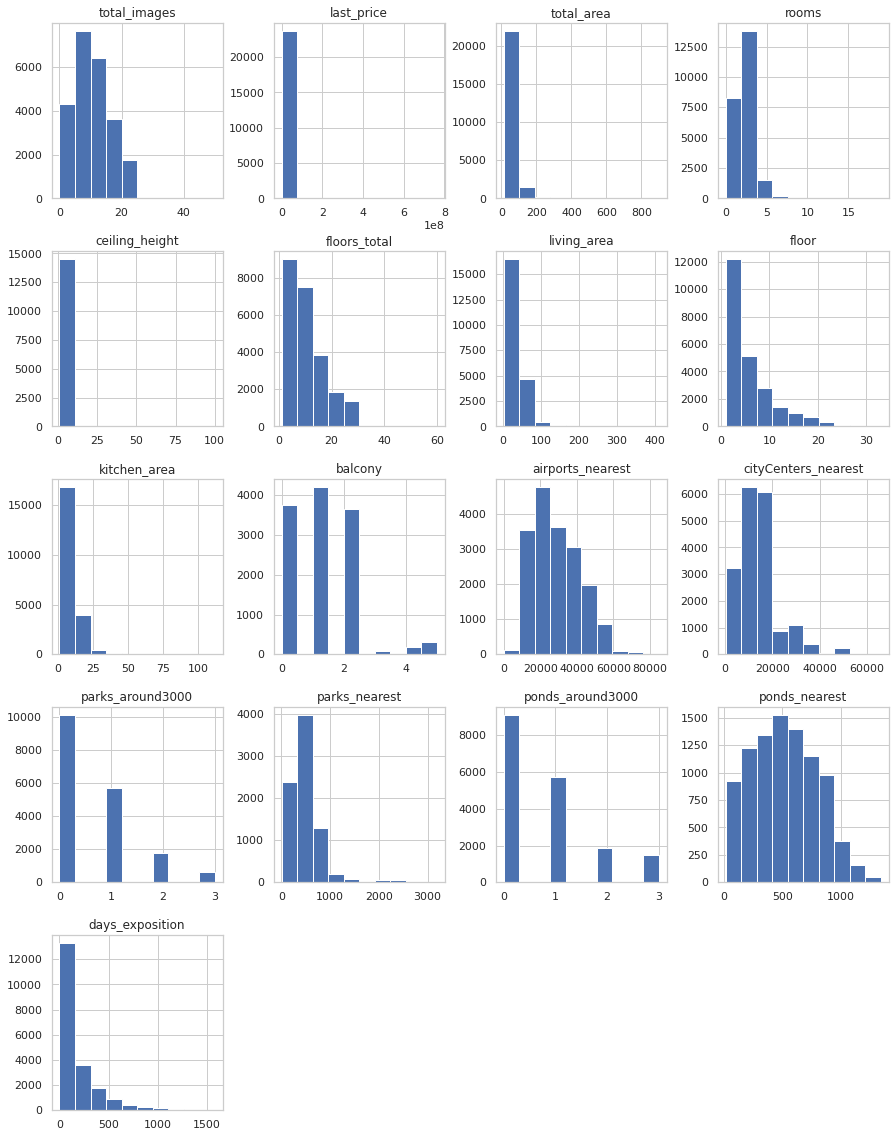

In [3]:
raw_data.hist(figsize=(15, 20))
plt.show()

In [4]:
raw_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод: нужно поменять формат данных для даты, а так же в колонке "is_apartment" идёт тип bool. Для NaN значений в ней можно заменить их на False, чтобы не выкидывать данные. В колонках: "ceiling_height", "kitchen_area", "airports_nearest" есть аномалии. А так же есть выбросы. В общем и целом проблем до кучи.

Для столбцов могли быть разные причины. Для одних, возможно, продавцы недвижимости не стали заморачиваться и замерять, например, потолки, а для других, например таких как расстояние до водоёма или парка, отсутствие тех же водоёмов или парков. Расстояние до центра же могло отсутствовать по прочиние того, что недвижимость продаётся в посёлке или деревне, а значит расстояние до центра писать смысла нет, т.к. на этом имещуестве будет ярлык: "n-я область", а значит и расстояние будет порядочное.

### Предобработка данных

#### Высоту потолка думаю можно заполнить медианным значением. Дату перевести в тип datetime. Если апартаменты не указаны, скорее всего это не апартаменты. Если не указан балкон, то скорее всего его и вовсе нет. Пришлось поменять тип, тк в ходе решения задачи была проблема с тем, что он его конвертировал в object

In [5]:
raw_data['ceiling_height'] = raw_data['ceiling_height'].fillna(raw_data['ceiling_height'].median())
raw_data['ceiling_height'] = raw_data['ceiling_height'].astype('float64')
raw_data['first_day_exposition'] = pd.to_datetime(raw_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
raw_data["is_apartment"] = raw_data["is_apartment"].fillna(False)
raw_data["balcony"] = raw_data["balcony"].fillna(0)

raw_data = raw_data.dropna(subset=['locality_name'])

##### Я посчитал, что можно удалить строки без наименования места, тк неизвестно где будет продаваться участок или квартира, а это глупо. + строк всего 49 против почти 24000

In [6]:
for_none = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']

for name in for_none:
    raw_data[name] = raw_data[name].fillna(0)

#### В нижеперечисленных колонках значения NaN можно заменить на 0, тк оператор их не заполнил по причиние отсутствия. А в плане столбца 'cityCenters_nearest' значение отсутствует ввиду того, что это деревня, посёлок и т.п., а значит центр города ну явно не близко

#### Удалим неявные дубликаты

In [7]:
raw_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
raw_data.shape

(23650, 22)

In [9]:
raw_data.duplicated().sum()

0

In [10]:
raw_data['locality_name'].unique().shape

(364,)

In [11]:
temp = []

for string in raw_data['locality_name']:
    value = string.replace('посёлок','поселок')
    value = value.replace('поселок городского типа','поселок')
    value = value.replace('поселок городского типа','поселок')
    value = value.replace('поселок городской','поселок')
    value = value.replace('городской поселок','поселок')
    temp.append(value)
raw_data['locality_name'] = temp

In [12]:
raw_data.shape

(23650, 22)

In [13]:
raw_data['locality_name'].unique().shape

(322,)

In [14]:
raw_data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

#### Дубликатов больше быть не должно

#### Оставшиеся 4 колонки невозможно подправить или выбросить.

In [15]:
raw_data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              85
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2269
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

#### Теперь перейдём к аномалиям и выбросам. Начнём с аномалий

In [16]:
print(raw_data.info())
raw_data.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.675875,34.448356,5.893277,10.566403,0.591712,22063.392812,10889.429006,0.469091,167.359789,0.590359,199.009471,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.594823,22.037664,4.883317,5.901753,0.959662,16463.306970,9635.531486,0.748458,306.832134,0.883539,305.203376,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,10147.000000,2242.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,21868.000000,11250.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,34358.000000,15247.000000,1.000000,301.000000,1.000000,389.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<AxesSubplot:ylabel='Frequency'>

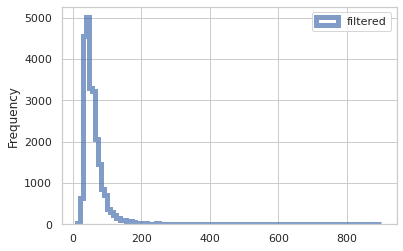

In [17]:
raw_data.plot(kind='hist', y='total_area', histtype='step', bins=100,
linewidth=5, alpha=0.7, label='filtered', grid=True, legend=True)

#### Видно, что после 200 почти нет множественного скопления данных, значит, что всё что больше 200 - выброс

In [18]:
raw_data.loc[raw_data['total_area'] > 200, 'total_area'] = raw_data.loc[raw_data['total_area'] > 200, 'total_area'] / 10

#### Далее на очереди высота потолка "ceiling_height"

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


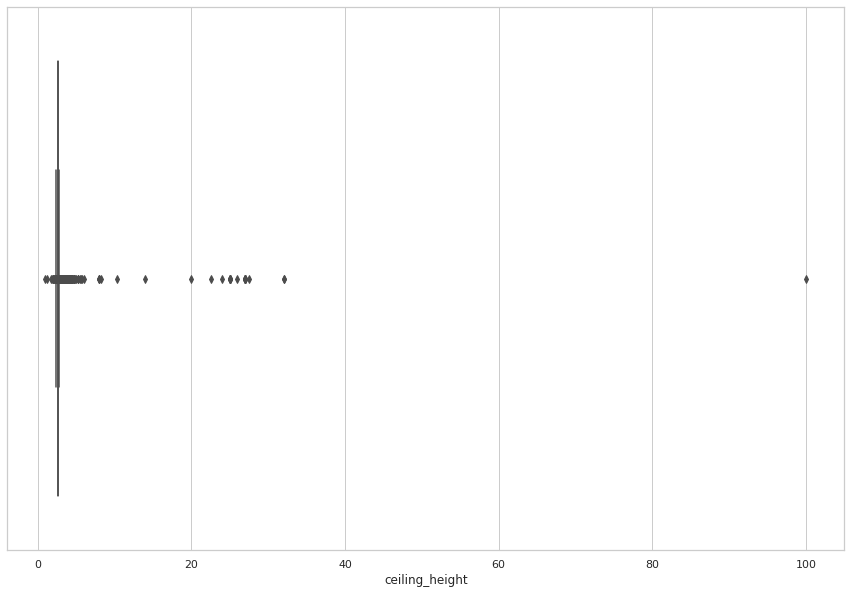

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(raw_data["ceiling_height"])
plt.show()

#### Если в теории, то дома с такой высотой потолков возможно существуют, но это определённо выброс. Оставим лишь недвижимость с высотой не более 7 м и не менее 1.5 м

In [20]:
raw_data = raw_data.loc[(raw_data["ceiling_height"] <= 7) & (raw_data["ceiling_height"] >= 1.5), :]

In [21]:
print(raw_data.shape)
raw_data.isna().sum()
#Отрезали около 600 строчек

(23619, 22)


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              85
living_area             1898
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2263
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3174
dtype: int64

In [22]:
raw_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23619.000000,2.361900e+04,23619.000000,23619.000000,23619.000000,23534.000000,21721.000000,23619.000000,21356.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,20445.000000
mean,9.862526,6.543427e+06,57.877647,2.070367,2.696814,10.677318,34.452633,5.893687,10.568307,0.590626,22069.000042,10891.744316,0.469114,167.369321,0.590245,199.126551,180.775153
std,5.679990,1.090292e+07,26.573661,1.078882,0.221130,6.592992,22.047446,4.882817,5.904279,0.958243,16461.879497,9634.205710,0.748449,306.885626,0.883232,305.302802,219.835051
min,0.000000,1.219000e+04,12.000000,0.000000,1.750000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,39.900000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,10195.000000,2242.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,21869.000000,11261.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,14.000000,6.800000e+06,68.400000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,34371.500000,15250.000000,1.000000,301.000000,1.000000,390.000000,231.000000
max,50.000000,7.630000e+08,200.000000,19.000000,6.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [23]:
# Продавать недвижимость без комнат - очевидная аномалия
raw_data = raw_data.loc[raw_data['rooms'] > 0, :]
print(raw_data.shape)

(23423, 22)


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


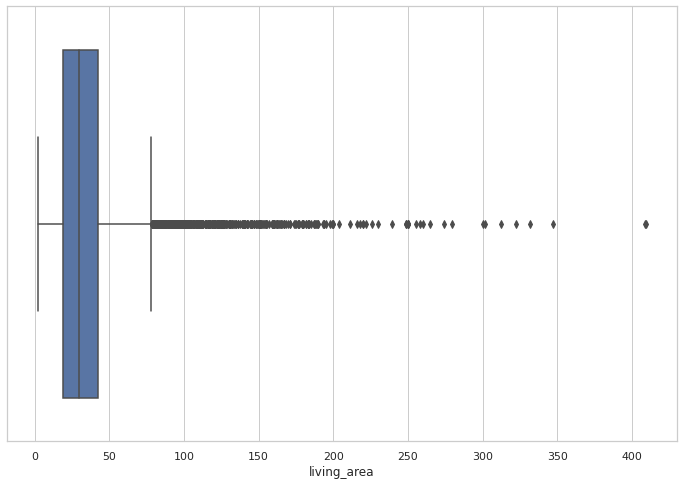

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(raw_data["living_area"])
plt.show()

#### Взглянем на площадь жилья. После 200 данные уже идут редко, думаю можно их откинуть ради целостности картины

In [25]:
raw_data = raw_data.loc[raw_data["living_area"] < 210, :]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


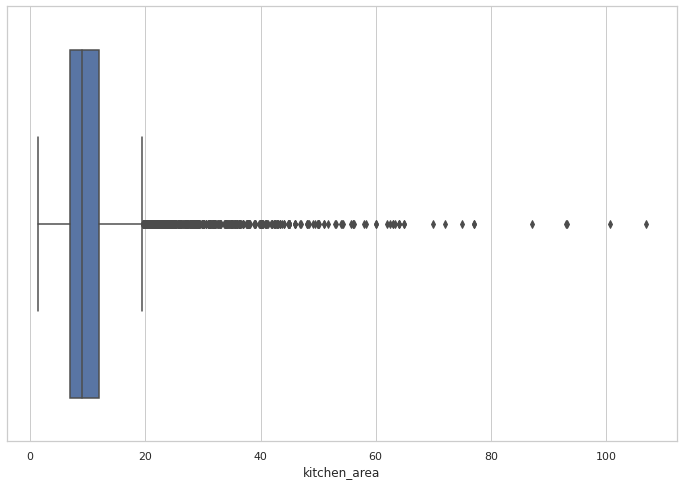

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(raw_data["kitchen_area"])
plt.show()

raw_data = raw_data.loc[raw_data["kitchen_area"] < 56, :]

#### Думаю вряд ли мы имеем дело с шейхами, у которых кухня 70+. Считаю это выбросом. Откинем значения, что более 56

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


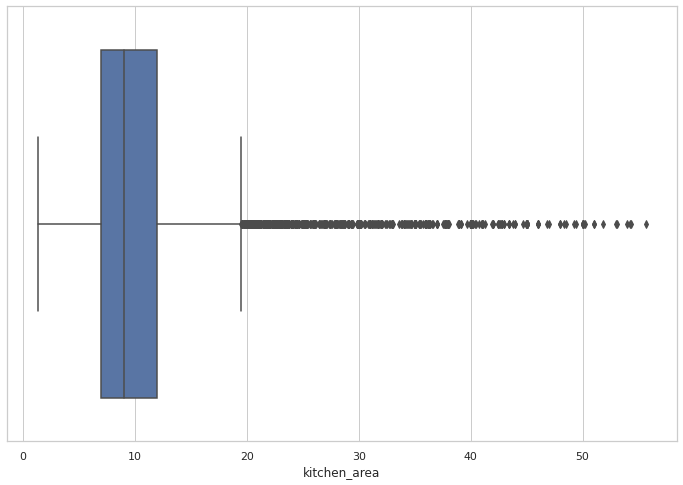

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(raw_data["kitchen_area"])
plt.show()

In [28]:
raw_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20863.000000,2.086300e+04,20863.000000,20863.000000,20863.000000,20825.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,20863.000000,17989.000000
mean,10.077601,6.324316e+06,58.226320,2.086469,2.695585,10.571717,34.261408,5.851651,10.397337,0.617840,22366.455304,11096.295691,0.473949,168.625509,0.591334,200.286536,185.281394
std,5.670664,8.087597e+06,26.145714,1.037778,0.218744,6.519103,19.943597,4.826408,5.228042,0.967749,16377.959208,9668.969393,0.749320,305.306528,0.883159,306.182508,221.748938
min,0.000000,1.219000e+04,14.000000,1.000000,1.750000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,3.500000e+06,40.000000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,10893.000000,3039.500000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,10.000000,4.695000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,22033.000000,11468.000000,0.000000,0.000000,0.000000,0.000000,102.000000
75%,14.000000,6.773881e+06,69.000000,3.000000,2.700000,15.000000,42.400000,8.000000,12.000000,1.000000,34551.500000,15319.000000,1.000000,308.500000,1.000000,392.000000,239.000000
max,50.000000,4.013000e+08,200.000000,16.000000,6.000000,60.000000,204.000000,33.000000,55.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### На этом этапе выбросы и аномалии были устранены по мере возможности, поэтому можно сказать, что данные очищены

In [29]:
data = raw_data
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,поселок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0


#### Тип данных нужно менять для корректной работы с ячейкой, в которой используется нужный формат. Например в нашем случае нужно перевести из строкового типа в тип время (to_datetime), чтобы можно было без лишних хлопот извлекать дату и время. В некоторых случаях нужно переводить строковый тип данных в числовой для того, чтобы вычисления происходили корректно. Например если нам нужно перемножить два столбца, а в одном тип будет 'string', то тогда вместо привычного перемножения мы лишь продублируем строку n-ое кол-во раз.

### Посчитаем и добавим в таблицу новые столбцы

In [30]:
data['price_meter'] = (data['last_price'] / data['total_area']).round(decimals=2)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,поселок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.71
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,88524.59
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25
11,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0,75000.00


In [31]:
data['day_name'] = data.loc[:,'first_day_exposition'].dt.strftime('%A')
data['month_name'] = data.loc[:,'first_day_exposition'].dt.strftime('%B')
data['year'] = data.loc[:,'first_day_exposition'].dt.strftime('%Y')

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_name,month_name,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,March,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,Tuesday,December,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday,August,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,June,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,поселок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.79,Monday,September,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.71,Thursday,November,2017
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,189.0,87454.76,Wednesday,May,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,88524.59,Sunday,February,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,Thursday,November,2017
11,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0,75000.00,Monday,August,2018


In [32]:
data['city_centers_km'] = (data['cityCenters_nearest'] / 1000).round(decimals=0)

In [33]:
data.reset_index(drop= True, inplace= True)

In [34]:
temp_list = []
for ind, total_floor in enumerate(data['floors_total']):
    try:
        if data['floor'][ind] == 1:
            temp_list.append('Первый')

        elif int(total_floor) == data['floor'][ind]:
            temp_list.append('Последний')

        else:
            temp_list.append('Другой')
    except:
        temp_list.append(np.nan)

In [35]:
data['floor_type'] = temp_list
del temp_list
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_name,month_name,year,city_centers_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,March,2019,16.0,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,Tuesday,December,2018,19.0,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday,August,2015,14.0,Другой
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,June,2018,8.0,Другой
4,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,поселок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.79,Monday,September,2018,0.0,Другой
5,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.71,Thursday,November,2017,19.0,Другой
6,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,0.0,0.0,0.0,0.0,0.0,0.0,189.0,87454.76,Wednesday,May,2018,0.0,Другой
7,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,88524.59,Sunday,February,2017,15.0,Другой
8,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,Thursday,November,2017,14.0,Другой
9,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0,75000.00,Monday,August,2018,52.0,Другой


### Проведем исследовательский анализ данных

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


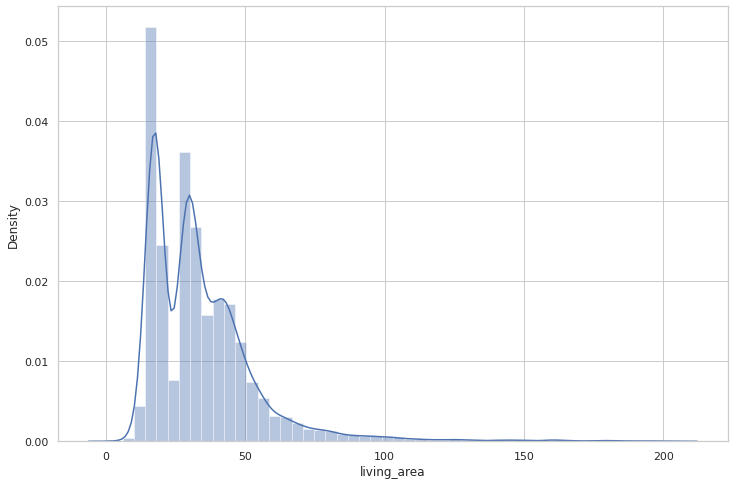

In [36]:
#living_area

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['living_area'])
plt.show()

#### living_area. Значения распределились от 10 до 100, потому что к этому моменту были приложены усилия

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


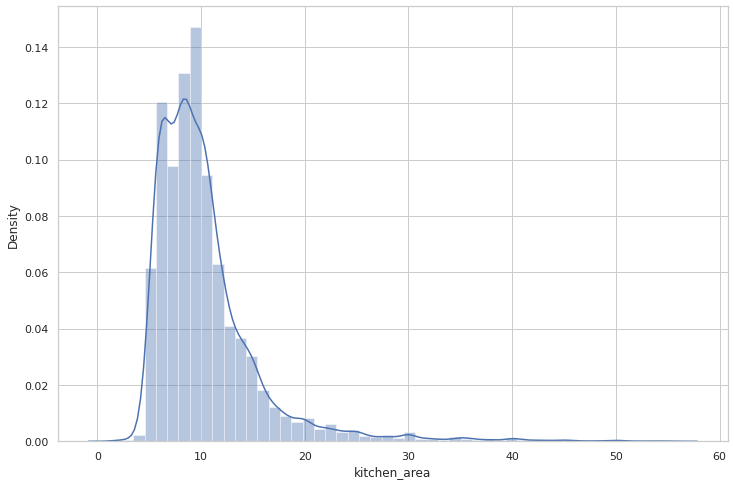

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['kitchen_area'])
plt.show()


#### kitchen_area. Основная масса приходится на 10 м^2, выбросы отсутствуют

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


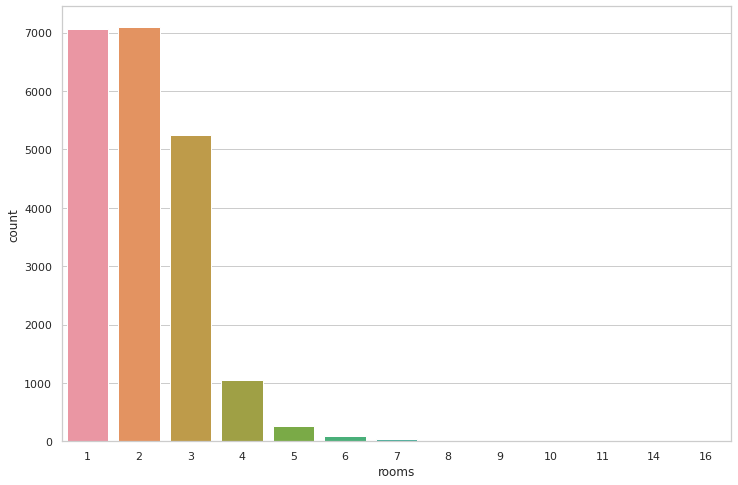

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['rooms'])
plt.show()

#### rooms. Логика подсказывает, что значения адекватны. Интересно лишь почему 1-о и 2-у комнтаные квартиры идут почти вровень

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


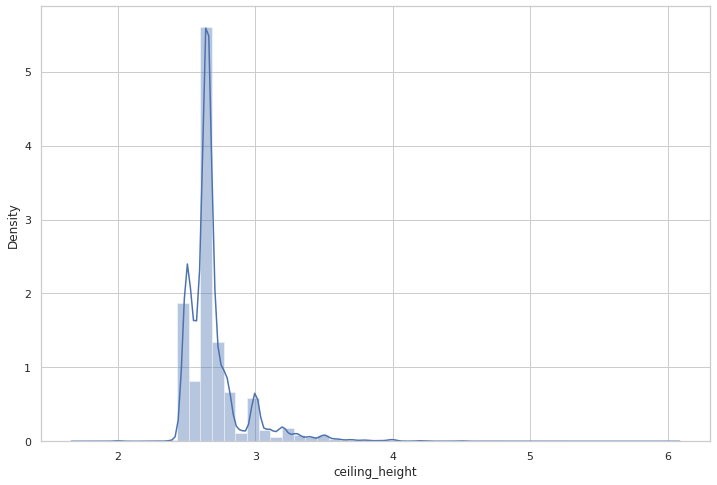

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['ceiling_height'])
plt.show()

#### ceiling_height. основная масса приходится на ~2.7 м по госту, так сказать

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


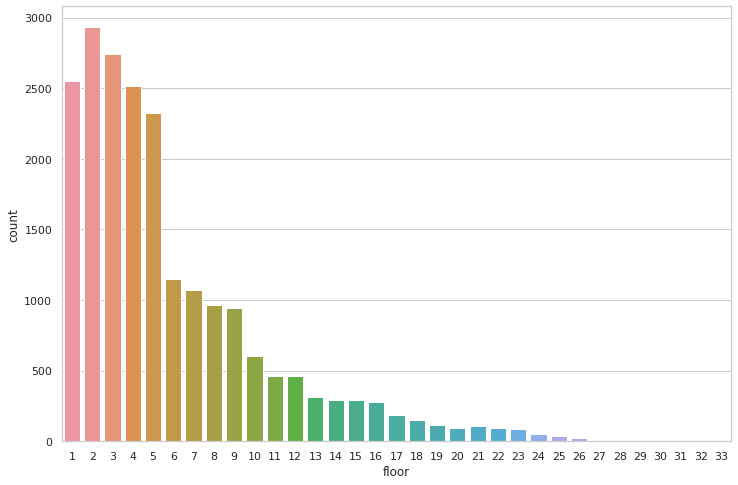

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['floor'])
plt.show()

#### floor. В основном выбирают 2 этаж, а что, в случае пожара хоть получится выпрыгнуть, да и хулиганы не полезут на 2 этаж. А вот число любителей посидеть повыше уменьшается с геомтреической прогрессией


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


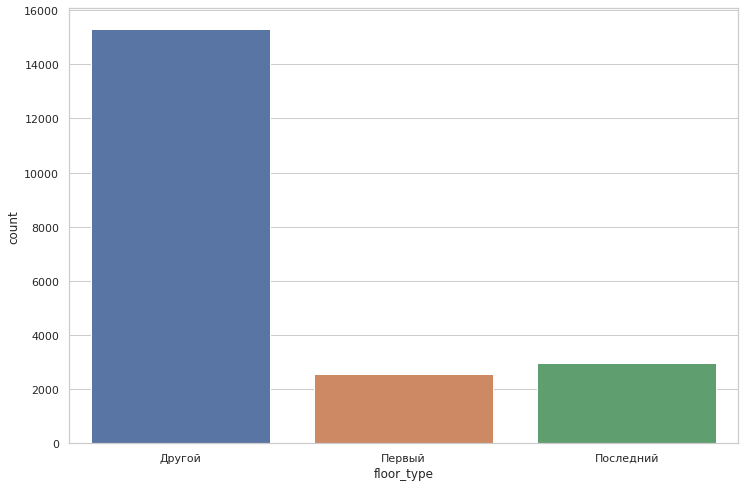

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['floor_type'])
plt.show()

#### floor_type. Первый и последний этажи люди не особо ценят

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


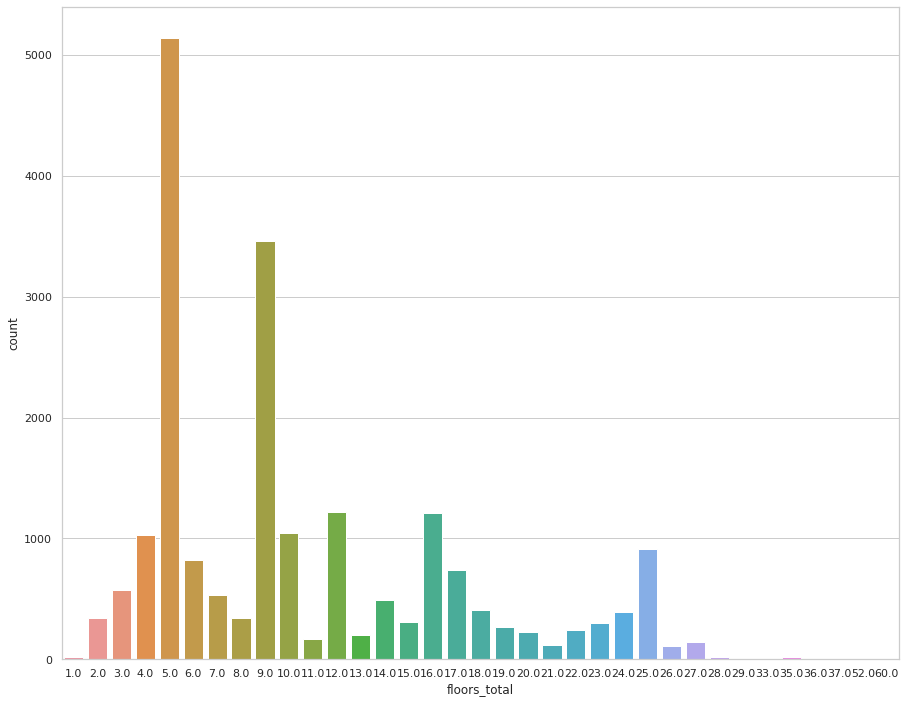

In [42]:
fig, ax = plt.subplots(figsize=(15,12))
sns.countplot(data['floors_total'].astype('int64', errors='ignore'))
plt.show()

#### floors_total. Раньше строили 5-и и 9-и этажные дома, вот их и покупают и продают чаще. Тут уж ничего не попишешь

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


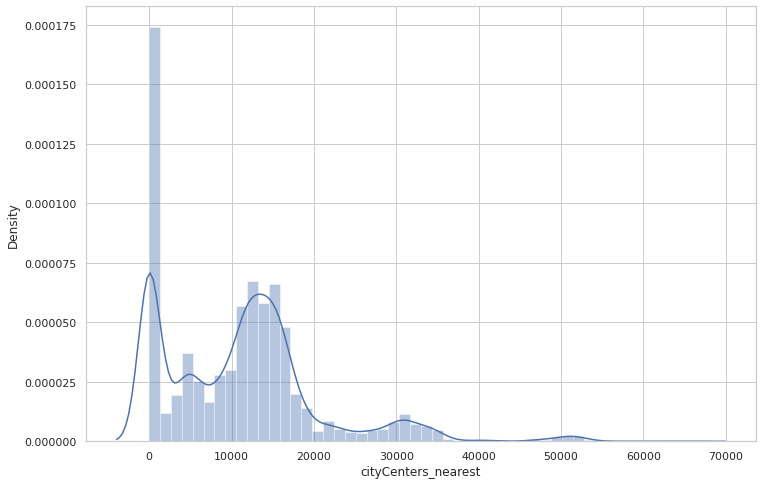

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['cityCenters_nearest'])
plt.show()

#### cityCenters_nearest. На 0 были заменены значения NaN, а значит, скорее всего в данных много информации о продажах вне города (деревни + посёлки). Напомню, минимальное расстояние до центра было 181 м, поэтому я и решил NaN прировнять к 0. Можно сделать вывод, что большинство покупает жильё в диапазоне от 10 до 20 км от центра

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


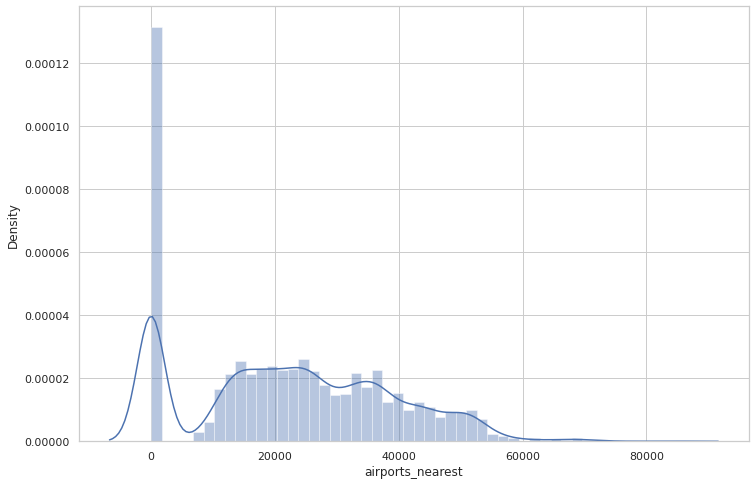

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['airports_nearest'])
plt.show()

#### airports_nearest. По той же схеме. Для значимой части не имеет значение есть ли аэропорт в городе или нет. Однако есть и те, кто старается брать в городах, где есть аэропорт или в соседних от таких (включая посёлки и деревни), но подальше от него (аэропорта)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


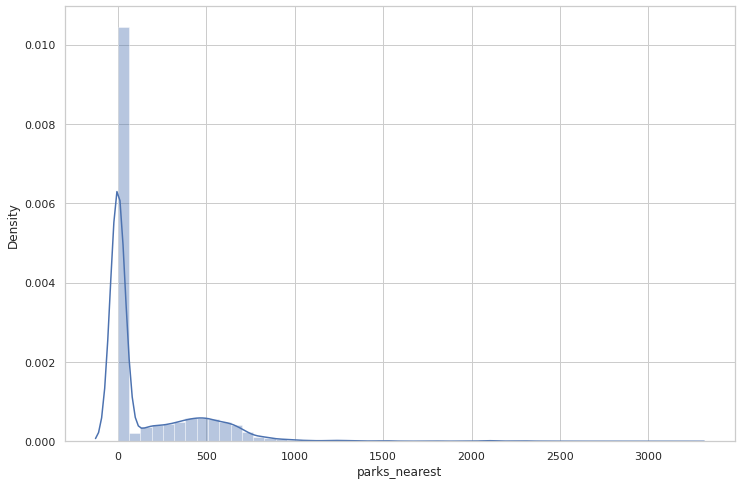

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['parks_nearest'])
plt.show()

#### parks_nearest. На графике видно, что для большей части этот аспект в выборе жилья не особо важен

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


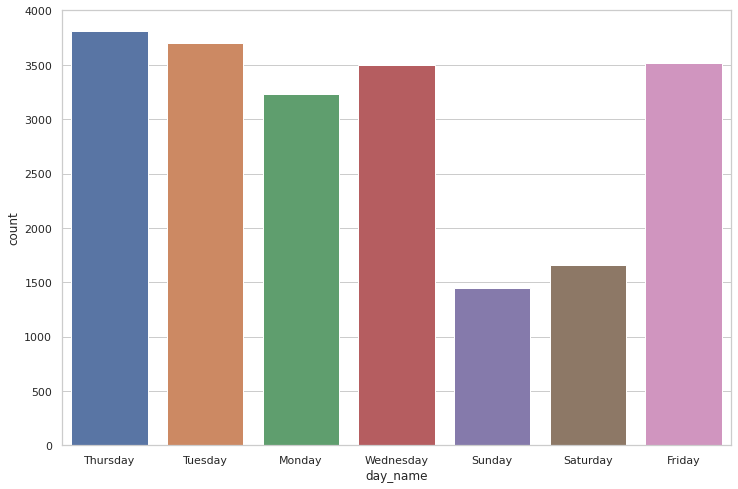

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['day_name'])
plt.show()

#### day_name. В субботу и воскресенье люди отдыхают и не особо думают на такую глобальную тему как выбор жилья

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


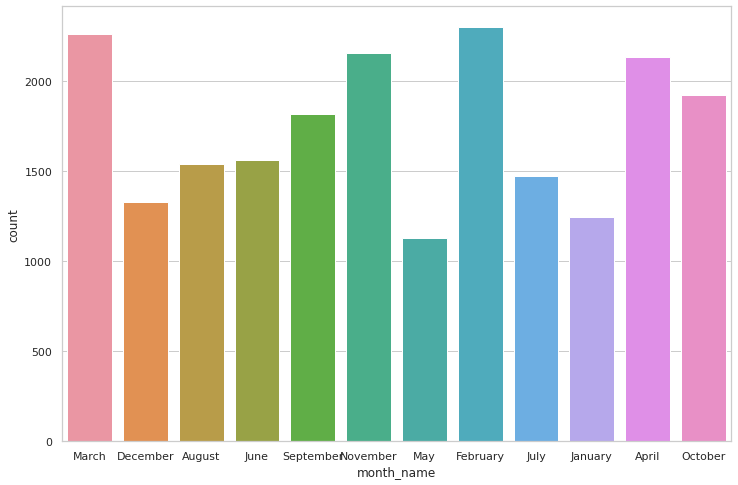

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data['month_name'])
plt.show()

#### month_name. Весной люди чаще задумываются над сменой жилья, возможно холодно на предыдущем месте жительства

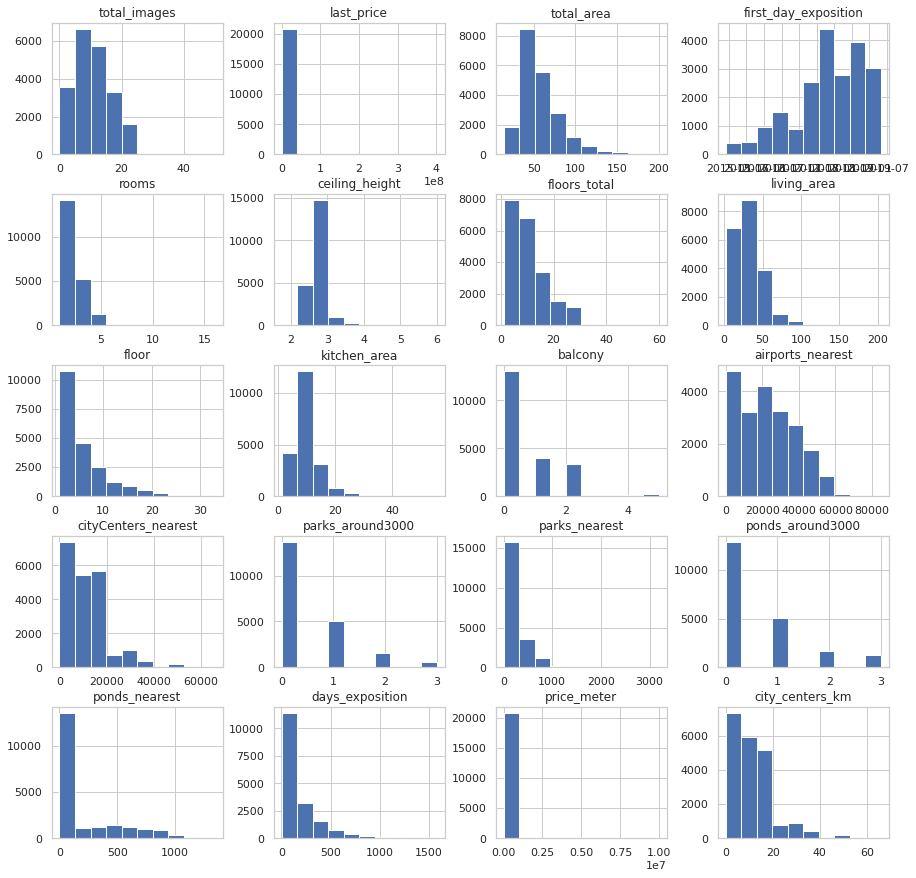

In [48]:
data.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

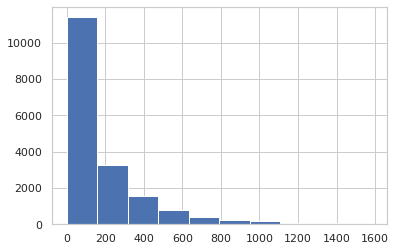

In [49]:
data['days_exposition'].hist()

In [50]:
print(data['days_exposition'].mean())
data['days_exposition'].median()

185.28139418533547


102.0

#### Если отталкиваться от графика, то множество квартир уходит за первый год. Однако есть и такие, что продаются более 3 лет. В среднем квартира уходит за чуть больше, чем полгода. Медиана же говорит, что чуть больше чем 3 месяца. Я думаю, что медианное значение можно рассматривать как идеальный вариант, а среднее как обычное время ожидания продажи. Следовательно необычайно долгими можно считать квартиры, что даже через 1.5 года остаются в продаже.

In [51]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_name,month_name,year,city_centers_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,March,2019,16.0,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,Tuesday,December,2018,19.0,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,Thursday,August,2015,14.0,Другой
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,June,2018,8.0,Другой
4,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.10,0.0,поселок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.79,Monday,September,2018,0.0,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20858,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.5,4,False,False,False,6.00,0.0,Тихвин,0.0,0.0,0.0,0.0,0.0,0.0,413.0,45000.00,Friday,July,2017,0.0,Другой
20859,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.95,Friday,August,2016,34.0,Другой
20860,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,Tuesday,March,2017,4.0,Другой
20861,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,0.0,0.0,0.0,0.0,0.0,0.0,45.0,52542.37,Monday,January,2018,0.0,Другой


#### "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

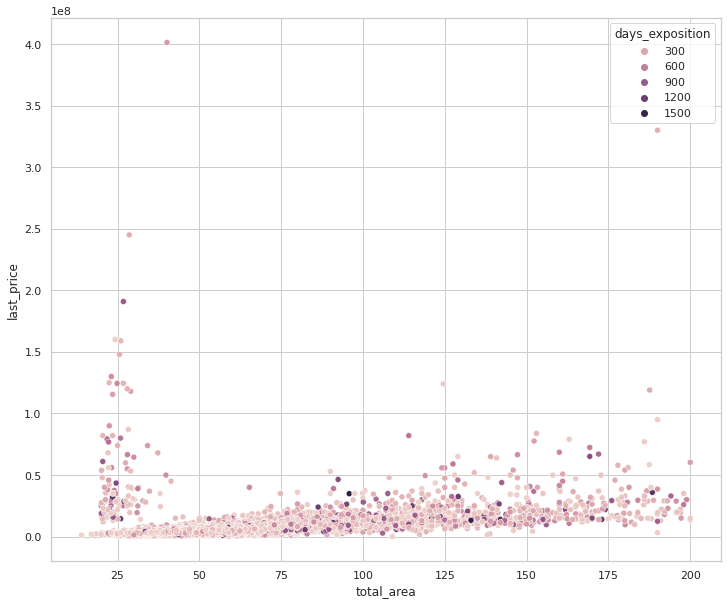

In [52]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=data, x='total_area', y="last_price", hue="days_exposition")

### На графике выше выделяется две группы: Первая - это группа помещений с малой площадью и высокой ценой. Возможно эта группа - недвижимость в самом центре. Вторая группа - скорее всего среднестатистическая недвижимость, которая растёт в цене пропорционально росту общей площади.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

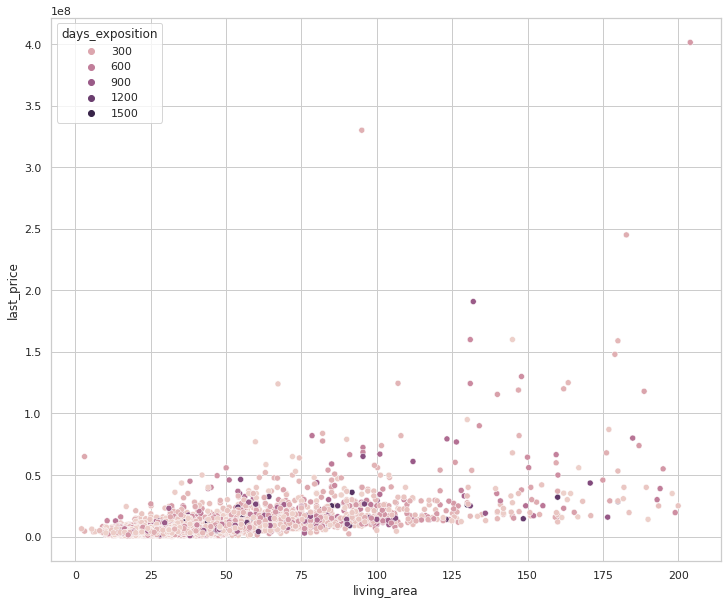

In [53]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=data, x='living_area', y="last_price", hue="days_exposition")

### Пусть и не ярко выражен, но всё же рост при увеличении жилой площади.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

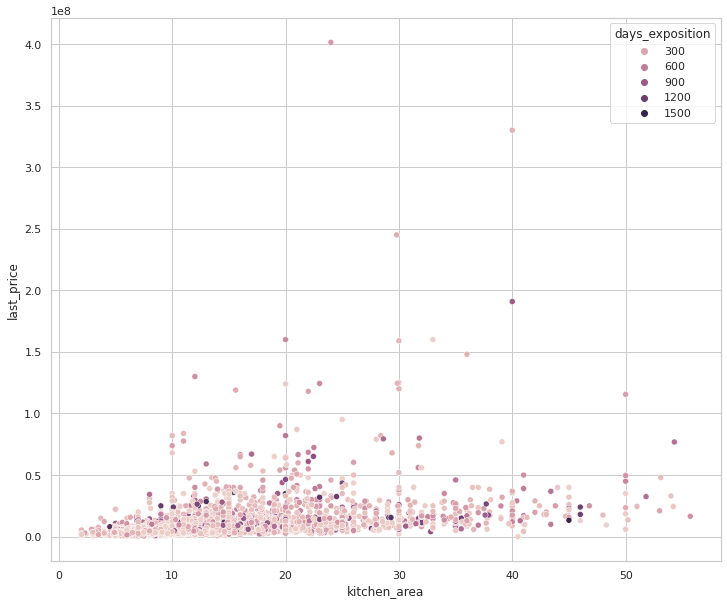

In [54]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=data, x='kitchen_area', y="last_price", hue="days_exposition")

### Аналогично верхнему графику.  Рост при увеличении площади кухни.

<AxesSubplot:xlabel='floor', ylabel='last_price'>

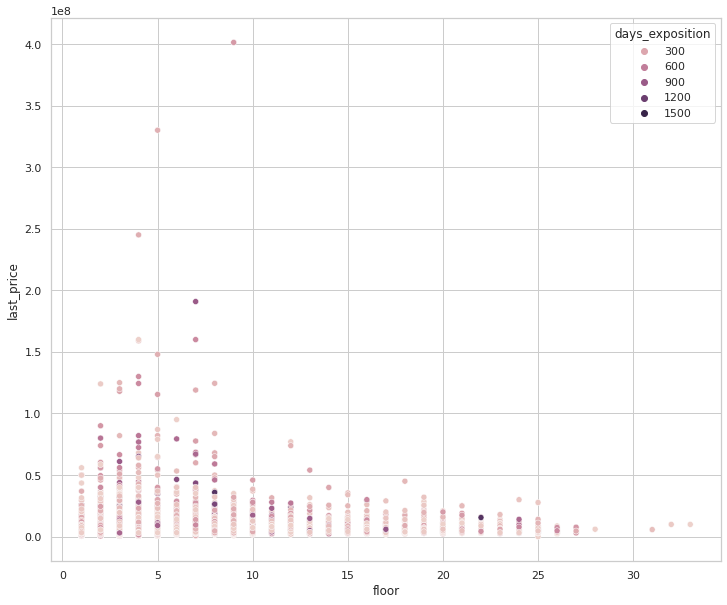

In [55]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=data, x='floor', y="last_price", hue="days_exposition")

#### 2 - 4 этажи чаще всего пользуются спросом, однако возможно график не совсем точен, так как почти в каждом доме есть 5-ый этаж, но не в каждом 10 и т.п., но исходя из этого, можно сделать вывод, что люди чаще выбирают 4-5 этажи вне завимисимости от того новый дом или нет.

In [56]:
data['year'] = data['year'].astype('int')

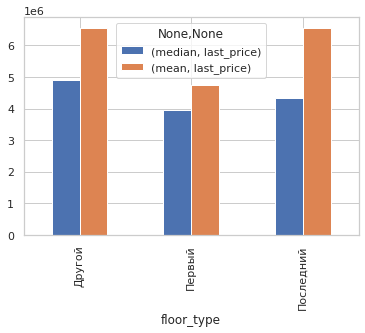

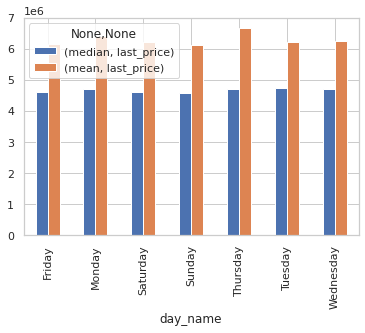

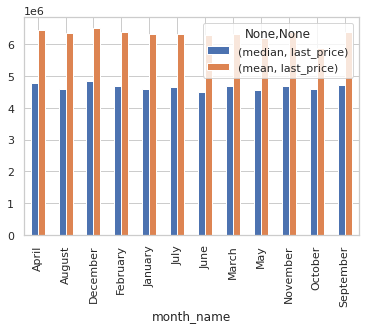

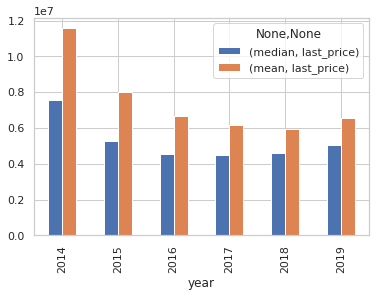

In [57]:
for col in ['floor_type', 'day_name', 'month_name', 'year']:
    pivot_data = pd.pivot_table(data, index=col, values='last_price', aggfunc=[np.median,np.mean]).plot.bar()
    plt.show()

#### Мне кажется, что все показатели выше влияют на финальную стоимость. Однако больше всего влияют все факторы в коллаборации друг с другом. Так же исходя из графика люди реже выбирают недвижимость на первом этаже. Из последнего же графика видно, что в 2014 г средняя и медиана были выше, возможно на остальные года сказались санкции.

In [58]:
top_10 = data.groupby('locality_name').count().reset_index().sort_values(by='total_images', ascending=False).rename(columns={'total_images':'counts'})[['locality_name', 'counts']][0:10].reset_index(drop=True)
top_10_names = list(top_10['locality_name'])

In [59]:
top_countries = data[data['locality_name'].isin(top_10_names)].groupby('locality_name')['price_meter'].mean().sort_values(ascending=False).reset_index().round(2)

top_countries

,locality_name,price_meter
0,Санкт-Петербург,130944.07
1,Пушкин,113978.87
2,деревня Кудрово,92248.48
3,поселок Парголово,90756.00
4,поселок Мурино,85412.82
5,Петергоф,83754.20
6,поселок Шушары,78535.19
7,Колпино,78194.26
8,Всеволожск,69029.15
9,Гатчина,68635.62


#### Если открыть карту, тожно сделать вывод, что все населённые пункты (кроме Санкт-Петербурга), являются Ленинградской областью, следовательно чем ближе к СПБ - тем больше цены

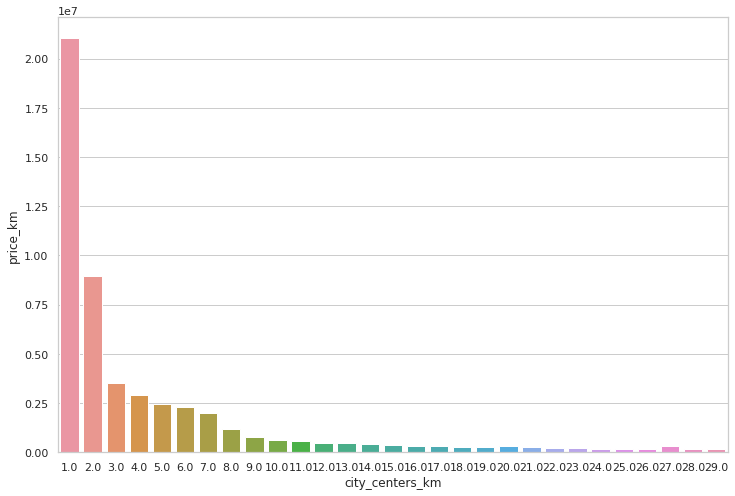

In [60]:
price_km = pd.DataFrame(data[data['locality_name'] == 'Санкт-Петербург']).reset_index(drop=True)
price_km['city_centers_km'] = round(price_km['city_centers_km'])
price_km['price_km'] = price_km['last_price'] / price_km['city_centers_km']
price = price_km.groupby('city_centers_km')['price_km'].mean()

price = price.reset_index().sort_values(by='city_centers_km',ascending=True)[1:]
price['price_km'] = round(price['price_km'], 2)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=price, x="city_centers_km", y="price_km")
plt.show()

### Можно сформировать вывод: чем ближе к центру - тем выше цена за километр

### Общий вывод: 
### На основании графиков можно сделать вывод, что немалая часть людей выбирает квартиры, которые имеют доступ к аэропорту. Так же наибольшее влияние имеет кол-во комнат, на втором месте сочетание жилой площади + общей площади. Плюсом к цене добавляется расстояние до центра, чем ближе - тем больше цена за километр. Хотелось бы, конечно, убрать некоторые NaN, но это было бы трудно со стороны тех, кто предоставил данные. Ещё есть одна интересная заметка: весной и в октябре люди чаще задумываются над сменой жилья. Возможно людям тяжело выдержать суровую погоду Ленинградской области. 2 - 4 этажи чаще всего пользуются спросом, исходя из этого можно сделать вывод, что люди чаще выбирают 4-5 этажи вне завимисимости от того новый дом или нет. Мне кажется, что все показатели выше влияют на финальную стоимость. Однако больше всего влияют все факторы в коллаборации друг с другом: общая площадь; жилая площадь; площадь кухни; количество комнат; тип этажа, на котором расположена квартира (первый, последний, другой). Так же самый дорогим по цене за квадратный метр является г. Санкт-Петербург. Все населённые пункты входящие в топ-10 являются Ленинградской областью. Так же множество квартир уходит за первый год. Однако есть и такие, что продаются более 3 лет. В среднем квартира уходит за чуть больше, чем полгода. Медиана же говорит, что чуть больше чем 3 месяца. Я думаю, что медианное значение можно рассматривать как идеальный вариант, а среднее как обычное время ожидания продажи. Следовательно необычайно долгими можно считать квартиры, что даже через 1.5 года остаются в продаже.